In [1]:
import math
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt

In [22]:
import os

In [23]:
os.listdir('./datasets'
          )

['bodyfat.csv',
 'Churn_Modelling.csv',
 'Folds5x2_pp.xlsx',
 'Google_Stock_Price_Test.csv',
 'Google_Stock_Price_Train.csv']

In [24]:
rnn_data = pd.read_csv("./datasets/Google_Stock_Price_Train.csv")
rnn_data.head()

,Date,Open,High,Low,Close,Volume
0,1/3/2012,325.25,332.83,324.97,663.59,"7,380,500"
1,1/4/2012,331.27,333.87,329.08,666.45,"5,749,400"
2,1/5/2012,329.83,330.75,326.89,657.21,"6,590,300"
3,1/6/2012,328.34,328.77,323.68,648.24,"5,405,900"
4,1/9/2012,322.04,322.29,309.46,620.76,"11,688,800"


In [25]:
rnn_data.shape

(1258, 6)

In [26]:
rnn_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1258 entries, 0 to 1257
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    1258 non-null   object 
 1   Open    1258 non-null   float64
 2   High    1258 non-null   float64
 3   Low     1258 non-null   float64
 4   Close   1258 non-null   object 
 5   Volume  1258 non-null   object 
dtypes: float64(3), object(3)
memory usage: 59.1+ KB


In [27]:
rnn_data.describe()

,Open,High,Low
count,1258.000000,1258.000000,1258.000000
mean,533.709833,537.880223,529.007409
std,151.904442,153.008811,150.552807
min,279.120000,281.210000,277.220000
25%,404.115000,406.765000,401.765000
50%,537.470000,540.750000,532.990000
75%,654.922500,662.587500,644.800000
max,816.680000,816.680000,805.140000


In [28]:
rnn_data.corr()

,Open,High,Low
Open,1.000000,0.999692,0.999498
High,0.999692,1.000000,0.999480
Low,0.999498,0.999480,1.000000


In [29]:
rnn_data.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Volume'], dtype='object')

In [30]:
data_set = rnn_data.loc[:,['Open']].values
data_set

array([[325.25],
       [331.27],
       [329.83],
       ...,
       [793.7 ],
       [783.33],
       [782.75]])

In [47]:
train = data_set[:len(data_set) - 50]
test = data_set[len(train):]

train.reshape(train.shape[0],1)
train.shape

(1208, 1)

In [48]:
test.shape

(50, 1)

In [49]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))
train_scaler = scaler.fit_transform(train)
train_scaler

array([[0.08886192],
       [0.10045847],
       [0.09768454],
       ...,
       [0.96447835],
       [0.97998536],
       [1.        ]])

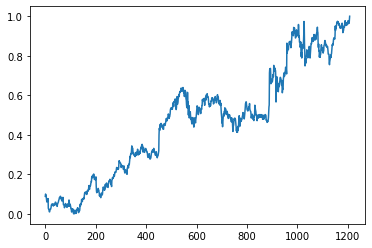

In [50]:
plt.plot(train_scaler)
plt.show()

In [51]:
X_train = []
Y_train = []
timesteps = 50

for i in range(timesteps, len(train_scaler)):
    X_train.append(train_scaler[i - timesteps:i, 0])
    Y_train.append(train_scaler[i,0])
    
X_train, Y_train = np.array(X_train), np.array(Y_train)

X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

In [52]:
X_train.shape

(1158, 50, 1)

In [53]:
Y_train.shape

(1158,)

In [54]:
from keras.models import Sequential
from keras.layers import Dense, SimpleRNN, Dropout


regressor = Sequential()


regressor.add(SimpleRNN(units = 50, activation = "tanh", return_sequences = True, input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(0.2))

regressor.add(SimpleRNN(units = 50, activation = "tanh", return_sequences = True))
regressor.add(Dropout(0.2))

regressor.add(SimpleRNN(units = 50, activation = "tanh", return_sequences = True))
regressor.add(Dropout(0.2))

regressor.add(SimpleRNN(units = 50))
regressor.add(Dropout(0.2))

regressor.add(Dense(units = 1))

regressor.compile(optimizer = "adam", loss = "mean_squared_error")

regressor.fit(X_train, Y_train, epochs = 100, batch_size = 32)

Epoch 1/100
37/37 [==============================] - 3s 23ms/step - loss: 0.4654
Epoch 2/100
37/37 [==============================] - 1s 23ms/step - loss: 0.2862
Epoch 3/100
37/37 [==============================] - 1s 23ms/step - loss: 0.2168
Epoch 4/100
37/37 [==============================] - 1s 23ms/step - loss: 0.1655
Epoch 5/100
37/37 [==============================] - 1s 23ms/step - loss: 0.1302
Epoch 6/100
37/37 [==============================] - 1s 23ms/step - loss: 0.1057
Epoch 7/100
37/37 [==============================] - 1s 23ms/step - loss: 0.0927
Epoch 8/100
37/37 [==============================] - 1s 23ms/step - loss: 0.0818
Epoch 9/100
37/37 [==============================] - 1s 23ms/step - loss: 0.0617
Epoch 10/100
37/37 [==============================] - 1s 23ms/step - loss: 0.0598
Epoch 11/100
37/37 [==============================] - 1s 23ms/step - loss: 0.0507
Epoch 12/100
37/37 [==============================] - 1s 23ms/step - loss: 0.0420
Epoch 13/100
37/37 [=====

In [55]:
inputs = data_set[len(data_set) - len(test) - timesteps:]
inputs = scaler.transform(inputs)

In [56]:
X_test = []
for i in range(timesteps, inputs.shape[0]):
    X_test.append(inputs[i - timesteps:i, 0])
    
X_test_rnn = np.array(X_test)
X_test_rnn = np.reshape(X_test_rnn, (X_test_rnn.shape[0], X_test_rnn.shape[1], 1))
predicted_stock_price = regressor.predict(X_test_rnn)
predicted_stock_price = scaler.inverse_transform(predicted_stock_price)

2/2 [==============================] - 0s 7ms/step


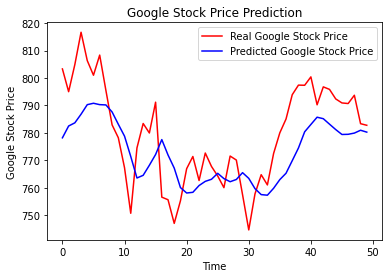

In [57]:
plt.plot(test, color = "red", label = "Real Google Stock Price")
plt.plot(predicted_stock_price, color = "blue", label = "Predicted Google Stock Price")
plt.title("Google Stock Price Prediction")
plt.xlabel("Time")
plt.ylabel("Google Stock Price")
plt.legend()
plt.show()

# LSTM

In [58]:
trainX = np.reshape(X_train, (X_train.shape[0], 1, X_train.shape[1]))


In [59]:
model = Sequential()
model.add(LSTM(10, input_shape = (1, timesteps)))
model.add(Dense(1))
model.compile(loss = "mean_squared_error", optimizer = "adam")
model.fit(trainX, Y_train, epochs = 50, batch_size = 1)


Epoch 1/50
1158/1158 [==============================] - 3s 1ms/step - loss: 0.0039
Epoch 2/50
1158/1158 [==============================] - 2s 1ms/step - loss: 0.0014
Epoch 3/50
1158/1158 [==============================] - 2s 1ms/step - loss: 0.0012
Epoch 4/50
1158/1158 [==============================] - 2s 1ms/step - loss: 9.9835e-04
Epoch 5/50
1158/1158 [==============================] - 2s 1ms/step - loss: 0.0010
Epoch 6/50
1158/1158 [==============================] - 2s 1ms/step - loss: 8.1551e-04
Epoch 7/50
1158/1158 [==============================] - 2s 1ms/step - loss: 7.9752e-04
Epoch 8/50
1158/1158 [==============================] - 2s 1ms/step - loss: 8.5227e-04
Epoch 9/50
1158/1158 [==============================] - 2s 1ms/step - loss: 8.0564e-04
Epoch 10/50
1158/1158 [==============================] - 2s 1ms/step - loss: 8.4045e-04
Epoch 11/50
1158/1158 [==============================] - 2s 1ms/step - loss: 8.5813e-04
Epoch 12/50
1158/1158 [==============================] - 

In [60]:
testX = np.array(X_test)
testX = testX.reshape(testX.shape[0], 1, testX.shape[1])

# Predict with testX
predict_lstm = model.predict(testX)
predict_lstm = scaler.inverse_transform(predict_lstm)

2/2 [==============================] - 0s 2ms/step


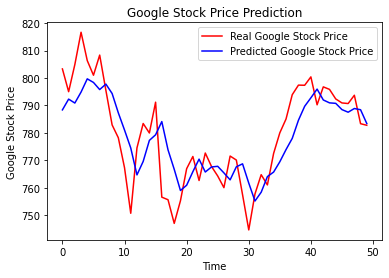

In [61]:
plt.plot(test, color = "red", label = "Real Google Stock Price")
plt.plot(predict_lstm, color = "blue", label = "Predicted Google Stock Price")
plt.title("Google Stock Price Prediction")
plt.xlabel("Time")
plt.ylabel("Google Stock Price")
plt.legend()
plt.show()